In [49]:
#Se importa las librerias que utilizaremos durante el analisis y la ejecución del proyecto:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff

In [50]:
#Hacemos lectura del Dataset, el cual se llama: fraud_detection

retiros=pd.read_csv("C:/Users/jforero/OneDrive - Grupo Bancolombia/91. Universidad - Especialización/6. Proyecto I/Retiros_historicos.csv")
retiros.head(10)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,...,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
0,3239,Bancolombia S.A.,70005072,SUC ARMENIA CENTRO CCIAL 1,99999999,Integración: Posición por defecto,Sur,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA QUINDIO Y NORTE DEL VALLE,GCIA ZONA QUINDIO Y NORTE DEL VALLE,SUC ARMENIA CENTRO,SUC ARMENIA CENTRO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,masculino
1,5346,Bancolombia S.A.,264,GCIA AUD PERSONAS PYMES Y EMPRESAS,10542,AUDITOR/A,Antioquia,No Convencionad (CO),CAMBIO ORG. CON CAM. REM (CO),PROMOCIÓN,...,NO APLICA,GCIA ZONA QUINDIO Y NORTE DEL VALLE,NO APLICA,SUC MONTENEGRO,PROFESIONAL,GRUPO SIN RED DE SUCURSALES,SUBGERENTE/A,Bancolombia S.A.,PROFESIONAL,masculino
2,6119,Bancolombia S.A.,2738,SUC BANCA COLOMBIA OVIEDO DS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,SUC BANCA COLOMBIA OVIEDO,SUC BANCA COLOMBIA OVIEDO,NaN,NaN,SUBGERENTE/A,Bancolombia S.A.,PROFESIONAL,femenino
3,10332,Bancolombia S.A.,70005179,SUC CALASANZ CCIAL 1,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,SUC CALASANZ,SUC CALASANZ,NaN,NaN,ASESOR/A COMERCIAL PYME,Bancolombia S.A.,OPERATIVO,femenino
4,14050,Bancolombia S.A.,1005,SUC PUERTO LOPEZ,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,SUC PUERTO LOPEZ,SUC PUERTO LOPEZ,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
5,15715,Bancolombia S.A.,2115,SUC BELLO DS,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,SUC BELLO,SUC BELLO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
6,19401,Valores Bancolombia S.A.,70004166,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),RETIRO VOLUNTARIO,...,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,NaN,NaN,GERENTE/A BANCA PRIVADA,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,femenino
7,21439,Bancolombia S.A.,1182,SERVICIO SUC BOGOTA CENTRO,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA SERVICIO EN SUCURSALES BOGOTA,GCIA SERVICIO EN SUCURSALES BOGOTA,SERVICIO SUC BOGOTA CENTRO,SERVICIO SUC BOGOTA CENTRO,NaN,NaN,SUPERNUMERARIO/A,Bancolombia S.A.,OPERATIVO,femenino
8,25323,Valores Bancolombia S.A.,70004188,GCIA CCIAL ACCIONES MEDELLIN 3,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA CCIAL ACCIONES MEDELLIN 3,GCIA CCIAL ACCIONES MEDELLIN 3,NaN,NaN,GERENTE/A COMERCIAL,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,masculino
9,47241,Bancolombia S.A.,70005312,LDC ANALISIS INTEGRACION Y DATOS 6 TI,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),RETIRO VOLUNTARIO,...,EVC SERV E INTEG GBNO APIS TI,EVC SERV E INTEG GBNO APIS TI,ADC ANALISIS INTEGRACION Y DATOS TI,ADC ANALISIS INTEGRACION Y DATOS TI,NaN,NaN,LIDER LINEA DE CONOCIMIENTO,Bancolombia S.A.,PROFESIONAL,femenino


In [51]:
#Conteo de registros totales  columnas

print("Forma de la base de fraude (filas, columnas):", retiros.shape)
print(f"Total de registros: {retiros.shape[0]}")
print(f"Total de columnas: {retiros.shape[1]}")

Forma de la base de fraude (filas, columnas): (108878, 31)
Total de registros: 108878
Total de columnas: 31


In [52]:
#Seguir conocimiento la base de datos y su tipo de dato, esto es importante si más adelante necesitamos realizar algunas operaciones.
retiros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108878 entries, 0 to 108877
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID_EMPLEADOS              108878 non-null  int64  
 1   COMPAÑÍA                  108878 non-null  object 
 2   CODIGO_AREA               108878 non-null  int64  
 3   AREA                      108867 non-null  object 
 4   CODIGO_CARGO              108878 non-null  int64  
 5   CARGO                     108878 non-null  object 
 6   REGION                    108878 non-null  object 
 7   FORMA_DE_TRABAJO          108878 non-null  object 
 8   CLASE_DE_MEDIDA           108878 non-null  object 
 9   MOTIVO_RETIRO             108878 non-null  object 
 10  FECHA_DESDE               108878 non-null  object 
 11  CODIGO_AREA_ANTERIOR      90372 non-null   float64
 12  CODIGO_CARGO_ANTERIOR     86299 non-null   float64
 13  AÑO                       108878 non-null  i

Vamos a conocer en detalle cada una de las variables del Dataset, a continuación la desripción de cada una de estas:

ID_EMPLEADOS: Es el código único del empleados, sirve como identificador

COMPAÑÍA: Internamente la organización tiene varias subcompañias, acá el nombre de cada una

CODIGO_AREA: Es el código con el cual se identifica el área donde trabaja el empleado

AREA: Es la descripción del área donde trabaja el empleado

CODIGO_CARGO: Es el código con el cual se identifica el cargo del empleado

CARGO:Es la descripción del cargo donde trabaja el empleado

REGION: Esta distribuido en las 5 regiones de Colombia

FORMA_DE_TRABAJO: clasificación de organización, entre empleados operativos (convencionados) o  profesionales (no convencionados, en transición)

CLASE_DE_MEDIDA: Es la novedad que se le aplica al empleado de acuerdo a: contratación, retiro, impacto salarial, ascenso o traslado horizontal.

MOTIVO_RETIRO: Es el motivo detallado de la clase de medida

FECHA_DESDE: Es la fecha exacta en la cual se aplica la novedad del empleado

CODIGO_AREA_ANTERIOR:  Es el código con el cual se identifica el área del empleado antes de la novedad

CODIGO_CARGO_ANTERIOR: Es el código con el cual se identifica el cargo del empleado antes de la novedad

AÑO: Es al año en la cual se aplico la novedad

PERIODO: Es el mes y año en la cual se aplico la novedad

VP ACTUAL: Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado

VP ANT:  Es la vicepresidencia (1er nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

2 ACT:  Es el área (2do nivel) donde se encuentra estructuralmente el empleado

2 ANT:   Es el área (2do nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

3 ACT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado

3 ANT:   Es el área (3cer nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

4 ACT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado

4 ANT:   Es el área (4to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

5 ACT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado

5 ANT:   Es el área (5to nivel) donde se encuentra estructuralmente el empleado, antes del movimiento

NIVEL_DEL_CARGO: Es la clasificación del cargo de acuerdo a su descripción 

RED_DE_SUCURSALES: Es la clasificación de los empelados de acuerdo a los comerciales y administrativos

CARGO_ANTERIOR: Es la descripción del cargo antes de la novedad

COMPAÑÍA_AANTERIOR: Internamente la organización tiene varias subcompañias, acá el nombre de cada una, es la compañia antes de la novedad

NIVEL_DEL_CARGO_ANTERIOR: Es la clasificación del cargo de acuerdo a su descripción, antes de la novedad

GÉNERO: Es la identificación del sexo del empleado

In [53]:
# Distribución de novedades de empleados por tipo
retiros['CLASE_DE_MEDIDA'].value_counts()

CLASE_DE_MEDIDA
CAMBIO ORG. SIN CAM. REM (CO)    37699
CAMBIO ORG. CON CAM. REM (CO)    32588
CONTRATACION (CO)                18494
RETIRO (CO)                      16174
IMPACTO SALARIAL (CO)             3922
RECONTRATACION (CO)                  1
Name: count, dtype: int64

In [54]:
retiros = retiros[retiros['CLASE_DE_MEDIDA'] == 'RETIRO (CO)']
retiros.head(10)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,...,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
0,3239,Bancolombia S.A.,70005072,SUC ARMENIA CENTRO CCIAL 1,99999999,Integración: Posición por defecto,Sur,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA QUINDIO Y NORTE DEL VALLE,GCIA ZONA QUINDIO Y NORTE DEL VALLE,SUC ARMENIA CENTRO,SUC ARMENIA CENTRO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,masculino
2,6119,Bancolombia S.A.,2738,SUC BANCA COLOMBIA OVIEDO DS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,SUC BANCA COLOMBIA OVIEDO,SUC BANCA COLOMBIA OVIEDO,NaN,NaN,SUBGERENTE/A,Bancolombia S.A.,PROFESIONAL,femenino
3,10332,Bancolombia S.A.,70005179,SUC CALASANZ CCIAL 1,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,SUC CALASANZ,SUC CALASANZ,NaN,NaN,ASESOR/A COMERCIAL PYME,Bancolombia S.A.,OPERATIVO,femenino
4,14050,Bancolombia S.A.,1005,SUC PUERTO LOPEZ,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,SUC PUERTO LOPEZ,SUC PUERTO LOPEZ,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
5,15715,Bancolombia S.A.,2115,SUC BELLO DS,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,SUC BELLO,SUC BELLO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
6,19401,Valores Bancolombia S.A.,70004166,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),RETIRO VOLUNTARIO,...,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,NaN,NaN,GERENTE/A BANCA PRIVADA,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,femenino
7,21439,Bancolombia S.A.,1182,SERVICIO SUC BOGOTA CENTRO,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA SERVICIO EN SUCURSALES BOGOTA,GCIA SERVICIO EN SUCURSALES BOGOTA,SERVICIO SUC BOGOTA CENTRO,SERVICIO SUC BOGOTA CENTRO,NaN,NaN,SUPERNUMERARIO/A,Bancolombia S.A.,OPERATIVO,femenino
8,25323,Valores Bancolombia S.A.,70004188,GCIA CCIAL ACCIONES MEDELLIN 3,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO ARREGLO MUTUO,...,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA CCIAL ACCIONES MEDELLIN 3,GCIA CCIAL ACCIONES MEDELLIN 3,NaN,NaN,GERENTE/A COMERCIAL,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,masculino
9,47241,Bancolombia S.A.,70005312,LDC ANALISIS INTEGRACION Y DATOS 6 TI,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),RETIRO VOLUNTARIO,...,EVC SERV E INTEG GBNO APIS TI,EVC SERV E INTEG GBNO APIS TI,ADC ANALISIS INTEGRACION Y DATOS TI,ADC ANALISIS INTEGRACION Y DATOS TI,NaN,NaN,LIDER LINEA DE CONOCIMIENTO,Bancolombia S.A.,PROFESIONAL,femenino
10,48330,Bancolombia S.A.,935,SERVICIO SUC CENTRO SURCOLOMBIANA,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),RETIRO VOLUNTARIO,...,GCIA SERVICIO EN SUCURSALES CENTRO,GCIA SERVICIO EN SUCURSALES CENTRO,SERVICIO SUC CENTRO SURCOLOMBIANA,SERVICIO SUC CENTRO SURCOLOMBIANA,NaN,NaN,SUPERNUMERARIO/A,Bancolombia S.A.,OPERATIVO,femenino


In [55]:
#Seguir conocimiento la base de datos y su tipo de dato, esto es importante si más adelante necesitamos realizar algunas operaciones.
retiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16174 entries, 0 to 108877
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              16174 non-null  int64  
 1   COMPAÑÍA                  16174 non-null  object 
 2   CODIGO_AREA               16174 non-null  int64  
 3   AREA                      16163 non-null  object 
 4   CODIGO_CARGO              16174 non-null  int64  
 5   CARGO                     16174 non-null  object 
 6   REGION                    16174 non-null  object 
 7   FORMA_DE_TRABAJO          16174 non-null  object 
 8   CLASE_DE_MEDIDA           16174 non-null  object 
 9   MOTIVO_RETIRO             16174 non-null  object 
 10  FECHA_DESDE               16174 non-null  object 
 11  CODIGO_AREA_ANTERIOR      16168 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     15424 non-null  float64
 13  AÑO                       16174 non-null  int64  
 14  PERIODO   

In [56]:
# Distribución de novedades de empleados por tipo
retiros['MOTIVO_RETIRO'].value_counts()

MOTIVO_RETIRO
VOLUNTARIO ARREGLO MUTUO          6149
RETIRO VOLUNTARIO                 5180
RETIRO SIN JUSTA CAUSA            1819
RETIRO POR JUSTA CAUSA            1513
FINALIZACIÓN CONTRATO TÉRMINO      635
RETIRO POR PENSIÓN                 570
RETIRO EN PERIODO DE PRUEBA        160
RETIRO POR FALLECIMIENTO           110
RETIRO POR SUSTITUCIÓN PATRONA      22
RETIRO POR OTRAS CAUSAS             10
CANCELACIÓN CONTRATO TÉRMINO F       4
PENSIÓN DE INVALIDEZ                 2
Name: count, dtype: int64

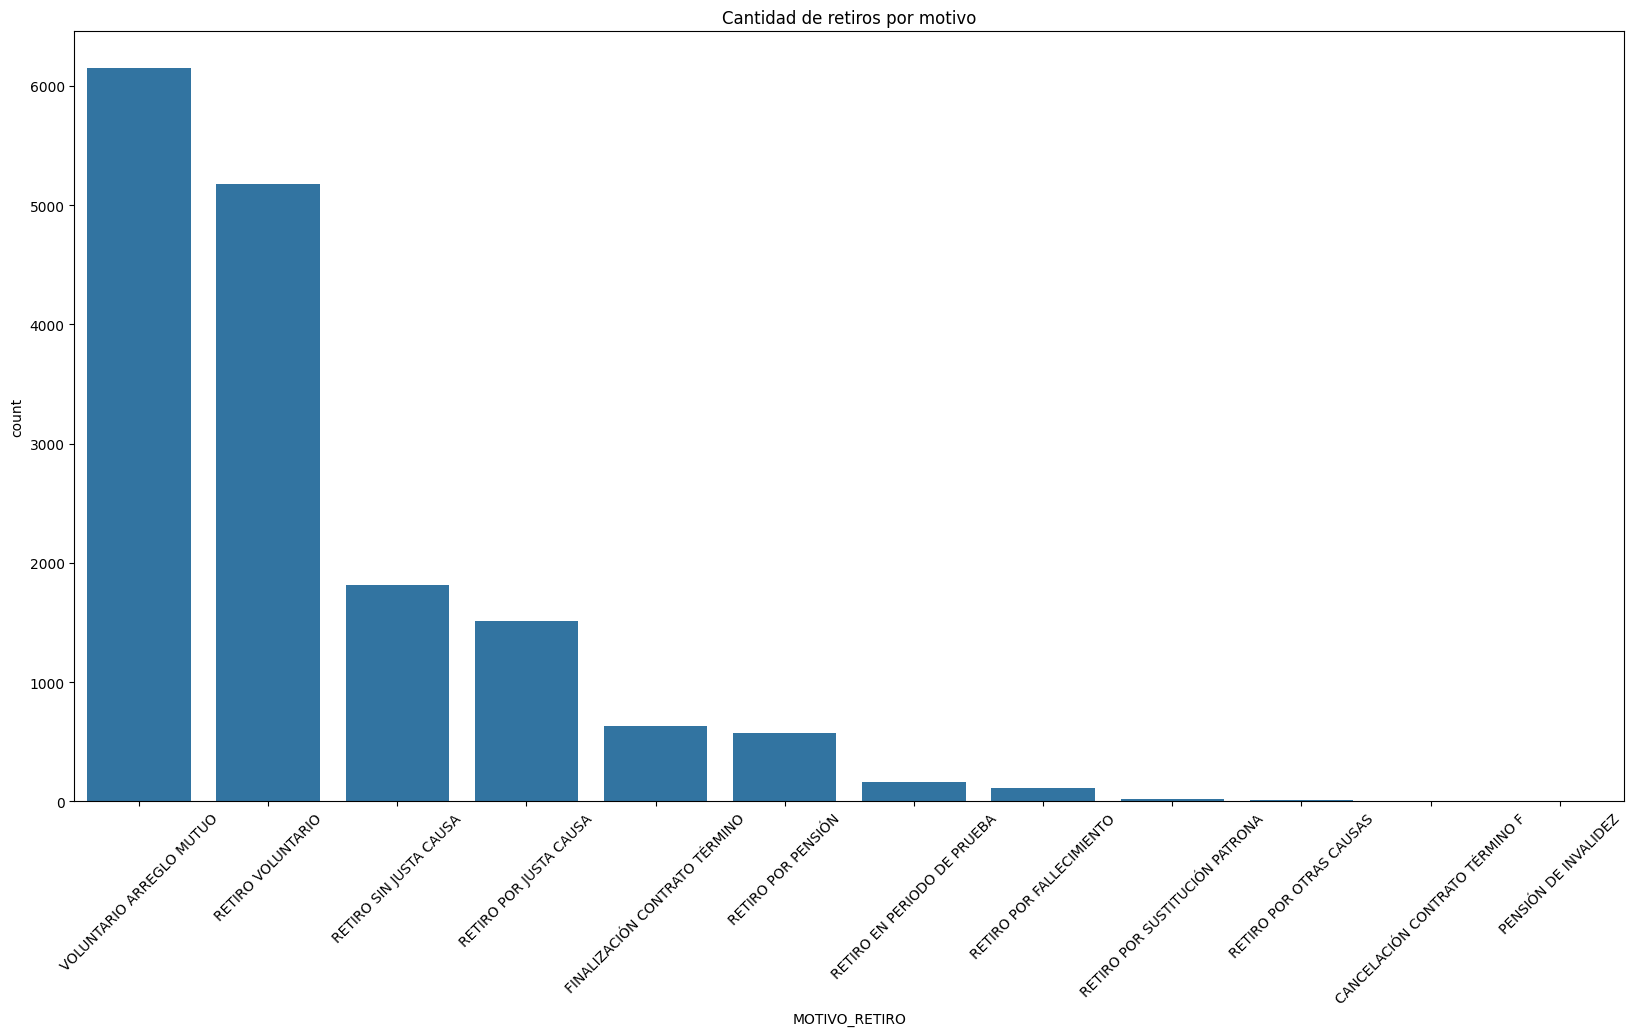

In [57]:
#Grafico de barras de la variable motivo de retiro, nos ayuda a identificar cual es el motivo y su representatividad

plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo')
plt.xticks(rotation=45)
plt.show()

Se puede evidenciar que la mayor proporición de retiros se da para: voluntario arreglo mutuo y retiro voluntario; Es importante resaltar que para las organizaciones el tipo de retiro "Voluntario arreglo mutuo" es un retiro voluntario pero por las condiciones especificas del empleado se les da una bonificación y su retiro queda marcado como: "voluntario arreglo mutuo", pero con esta definición se puede asociar que finalmente también es un retiro voluntario.

In [58]:
#De acuerdo al comentario anterior, vamos a homologar los retiros "voluntario arreglo mutuo" y "voluntario arreglo mutuo" a "voluntario"
retiros['MOTIVO_RETIRO'] = retiros['MOTIVO_RETIRO'].replace({'VOLUNTARIO ARREGLO MUTUO': 'VOLUNTARIO', 'RETIRO VOLUNTARIO': 'VOLUNTARIO'})
retiros.head(10)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,...,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
0,3239,Bancolombia S.A.,70005072,SUC ARMENIA CENTRO CCIAL 1,99999999,Integración: Posición por defecto,Sur,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA ZONA QUINDIO Y NORTE DEL VALLE,GCIA ZONA QUINDIO Y NORTE DEL VALLE,SUC ARMENIA CENTRO,SUC ARMENIA CENTRO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,masculino
2,6119,Bancolombia S.A.,2738,SUC BANCA COLOMBIA OVIEDO DS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,GCIA ZONA PREFERENCIAL BPP ANTIOQUIA,SUC BANCA COLOMBIA OVIEDO,SUC BANCA COLOMBIA OVIEDO,NaN,NaN,SUBGERENTE/A,Bancolombia S.A.,PROFESIONAL,femenino
3,10332,Bancolombia S.A.,70005179,SUC CALASANZ CCIAL 1,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,GCIA ZONA OCCIDENTE BPP ANTIOQUIA,SUC CALASANZ,SUC CALASANZ,NaN,NaN,ASESOR/A COMERCIAL PYME,Bancolombia S.A.,OPERATIVO,femenino
4,14050,Bancolombia S.A.,1005,SUC PUERTO LOPEZ,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,GCIA ZONA ORINOQUIA Y AMAZONIA BPP CENTR,SUC PUERTO LOPEZ,SUC PUERTO LOPEZ,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
5,15715,Bancolombia S.A.,2115,SUC BELLO DS,99999999,Integración: Posición por defecto,Antioquia,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,GCIA ZONA NORTE Y CHOCO BPP ANTIOQUIA,SUC BELLO,SUC BELLO,NaN,NaN,ASESOR/A COMERCIAL MULTISEGMENTO,Bancolombia S.A.,OPERATIVO,femenino
6,19401,Valores Bancolombia S.A.,70004166,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA REGIONAL PRIV PREF ANTIOQUIA,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,GCIA CCIAL BANCA PRIVADA ANTIOQUIA 2,NaN,NaN,GERENTE/A BANCA PRIVADA,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,femenino
7,21439,Bancolombia S.A.,1182,SERVICIO SUC BOGOTA CENTRO,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA SERVICIO EN SUCURSALES BOGOTA,GCIA SERVICIO EN SUCURSALES BOGOTA,SERVICIO SUC BOGOTA CENTRO,SERVICIO SUC BOGOTA CENTRO,NaN,NaN,SUPERNUMERARIO/A,Bancolombia S.A.,OPERATIVO,femenino
8,25323,Valores Bancolombia S.A.,70004188,GCIA CCIAL ACCIONES MEDELLIN 3,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA NACIONAL CLIENTES INSTITUCIONALES,GCIA CCIAL ACCIONES MEDELLIN 3,GCIA CCIAL ACCIONES MEDELLIN 3,NaN,NaN,GERENTE/A COMERCIAL,Valores Bancolombia S.A.,ESTRATEGICO MEDIO,masculino
9,47241,Bancolombia S.A.,70005312,LDC ANALISIS INTEGRACION Y DATOS 6 TI,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,EVC SERV E INTEG GBNO APIS TI,EVC SERV E INTEG GBNO APIS TI,ADC ANALISIS INTEGRACION Y DATOS TI,ADC ANALISIS INTEGRACION Y DATOS TI,NaN,NaN,LIDER LINEA DE CONOCIMIENTO,Bancolombia S.A.,PROFESIONAL,femenino
10,48330,Bancolombia S.A.,935,SERVICIO SUC CENTRO SURCOLOMBIANA,99999999,Integración: Posición por defecto,Centro,Convencionados (CO),RETIRO (CO),VOLUNTARIO,...,GCIA SERVICIO EN SUCURSALES CENTRO,GCIA SERVICIO EN SUCURSALES CENTRO,SERVICIO SUC CENTRO SURCOLOMBIANA,SERVICIO SUC CENTRO SURCOLOMBIANA,NaN,NaN,SUPERNUMERARIO/A,Bancolombia S.A.,OPERATIVO,femenino


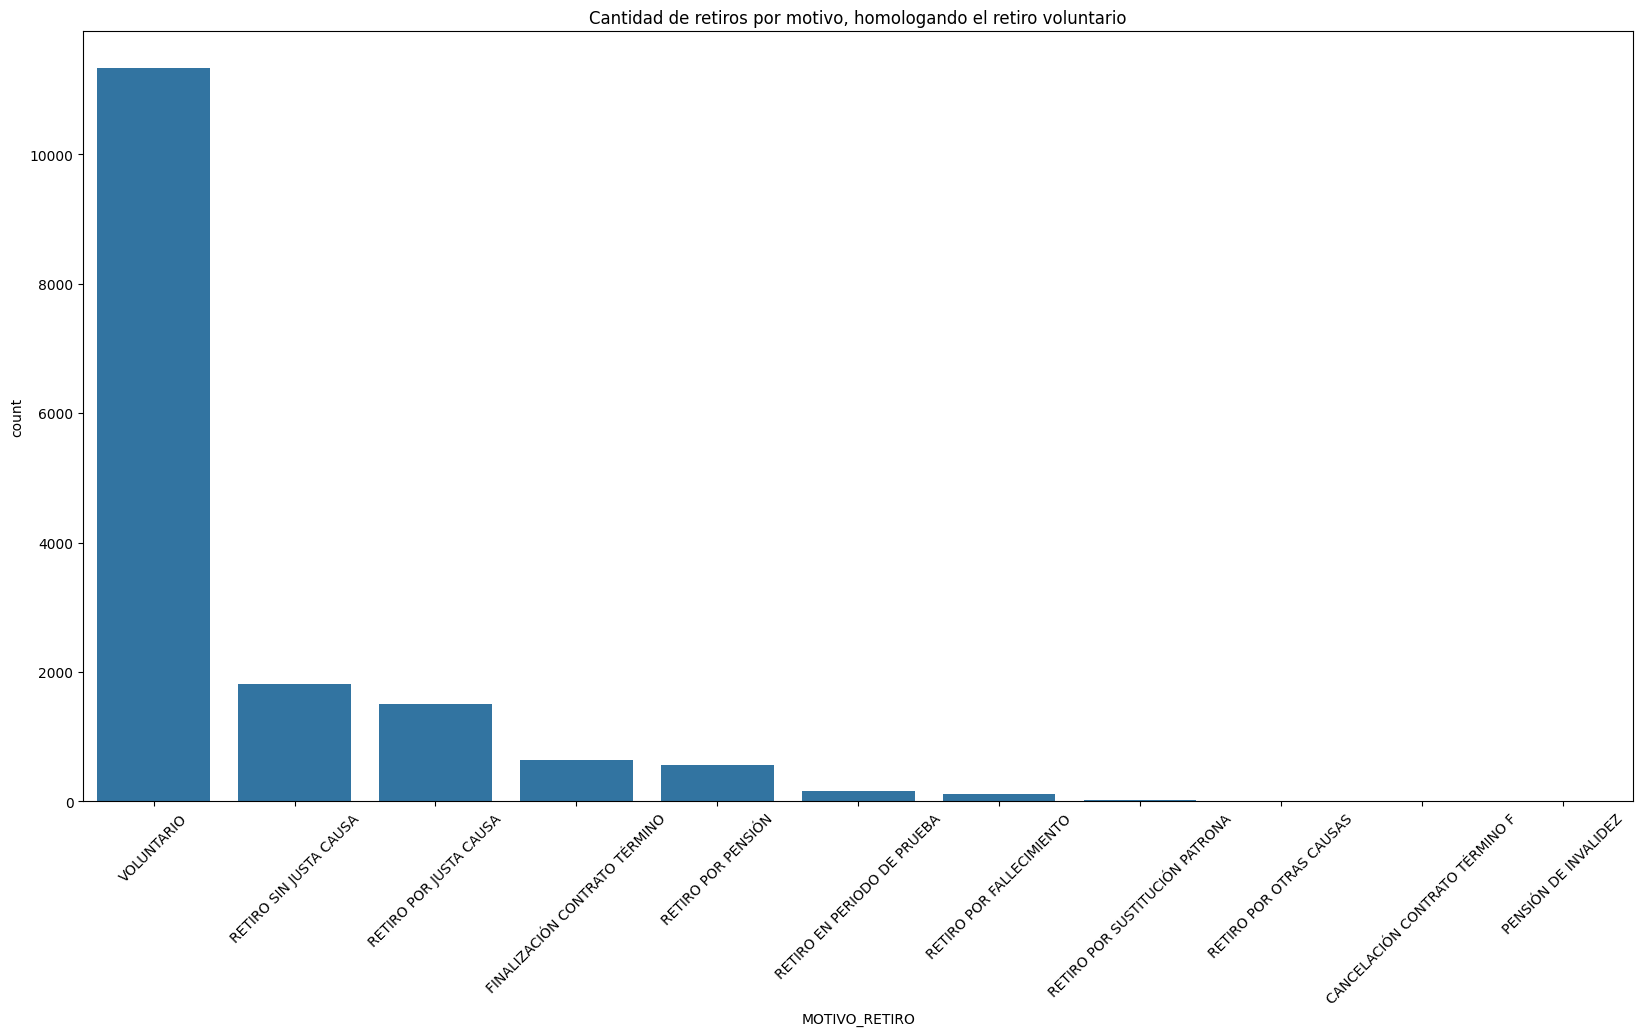

MOTIVO_RETIRO
VOLUNTARIO                        11329
RETIRO SIN JUSTA CAUSA             1819
RETIRO POR JUSTA CAUSA             1513
FINALIZACIÓN CONTRATO TÉRMINO       635
RETIRO POR PENSIÓN                  570
RETIRO EN PERIODO DE PRUEBA         160
RETIRO POR FALLECIMIENTO            110
RETIRO POR SUSTITUCIÓN PATRONA       22
RETIRO POR OTRAS CAUSAS              10
CANCELACIÓN CONTRATO TÉRMINO F        4
PENSIÓN DE INVALIDEZ                  2
Name: count, dtype: int64

In [59]:
#Volvemos a validar el grafico de retiros con el reemplazo
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo, homologando el retiro voluntario')
plt.xticks(rotation=45)
plt.show()

retiros['MOTIVO_RETIRO'].value_counts()

Se puede evidenciar que la proporción de retiro voluntario con respecto al total de retiros es alrededor del 70%

In [60]:
#Ahora, que tenemos la homologación de los retiros, vamos a realizar un conteo de los retiros por empleado, para ver si hay empleados que han tenido más de un retiro en el periodo analizado.
retiros['ID_EMPLEADOS'].value_counts().head(10)



ID_EMPLEADOS
53233       2
8461        2
37900       2
48330       1
9177        1
22355       1
90009138    1
498         1
1827        1
17627       1
Name: count, dtype: int64

In [61]:
#Filtramos solo los empleados que han tenido más de un retiro
retiros_duplicados = retiros[retiros['ID_EMPLEADOS'].duplicated(keep=False)]
retiros_duplicados = retiros_duplicados.sort_values(by='ID_EMPLEADOS')
retiros_duplicados.head(50)

,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,...,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
5837,8461,Bancolombia S.A.,259,GCIA AUDITORIA ENTORNO CORPORATIVO,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,NO APLICA,NO APLICA,NO APLICA,NO APLICA,NaN,NaN,AUDITOR/A,Bancolombia S.A.,PROFESIONAL,masculino
5983,8461,Bancolombia S.A.,259,GCIA AUDITORIA ENTORNO CORPORATIVO,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,NO APLICA,NO APLICA,NO APLICA,NO APLICA,NaN,NaN,AUDITOR/A,Bancolombia S.A.,PROFESIONAL,masculino
87874,37900,Bancolombia S.A.,1555,SUC CENTRO CCIAL HAYUELOS DS,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),RETIRO EN PERIODO DE PRUEBA,...,GCIA ZONA INDUSTRIAL BPP BOGOTA,GCIA ZONA INDUSTRIAL BPP BOGOTA,SUC MONTEVIDEO,SUC MONTEVIDEO,OPERATIVO,RED DE SUCURSALES,CAJERO,Bancolombia S.A.,OPERATIVO,Femenino
85652,37900,Bancolombia S.A.,1555,SUC CENTRO CCIAL HAYUELOS DS,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),RETIRO EN PERIODO DE PRUEBA,...,GCIA ZONA INDUSTRIAL BPP BOGOTA,GCIA ZONA INDUSTRIAL BPP BOGOTA,SUC MONTEVIDEO,SUC MONTEVIDEO,OPERATIVO,RED DE SUCURSALES,CAJERO,Bancolombia S.A.,OPERATIVO,Femenino
6976,53233,Bancolombia S.A.,6784,LDC PERSONAS INDEP Y ENCADENAMIENTOS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),FINALIZACIÓN CONTRATO TÉRMINO,...,CDE PROCESOS,CDE PROCESOS,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,NaN,NaN,DISEÑADOR/A PROCESOS,Bancolombia S.A.,PROFESIONAL,masculino
6960,53233,Bancolombia S.A.,6784,LDC PERSONAS INDEP Y ENCADENAMIENTOS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),FINALIZACIÓN CONTRATO TÉRMINO,...,CDE PROCESOS,CDE PROCESOS,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,NaN,NaN,DISEÑADOR/A PROCESOS,Bancolombia S.A.,PROFESIONAL,masculino


In [62]:
#Se evidencia que tenemos 3 registros duplicados con retiros, puede ser un tema de calidad en la información, acá debemos tomar una decisión de cual registro eliminar, haciendo un analisis identificamos que los registros son exactamnete igual, entonces procedemos a eliminarlos porque todos los datos son iguales
retiros_duplicados = retiros_duplicados.drop_duplicates()
retiros_duplicados = retiros_duplicados.sort_values(by='ID_EMPLEADOS')
retiros_duplicados.head(50)


,ID_EMPLEADOS,COMPAÑÍA,CODIGO_AREA,AREA,CODIGO_CARGO,CARGO,REGION,FORMA_DE_TRABAJO,CLASE_DE_MEDIDA,MOTIVO_RETIRO,...,4 ACT,4 ANT,5 ACT,5 ANT,NIVEL_DEL_CARGO,RED_DE_SUCURSALES,CARGO_ANTERIOR,COMPAÑÍA_AANTERIOR,NIVEL_DEL_CARGO_ANTERIOR,GÉNERO
5837,8461,Bancolombia S.A.,259,GCIA AUDITORIA ENTORNO CORPORATIVO,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),VOLUNTARIO,...,NO APLICA,NO APLICA,NO APLICA,NO APLICA,NaN,NaN,AUDITOR/A,Bancolombia S.A.,PROFESIONAL,masculino
87874,37900,Bancolombia S.A.,1555,SUC CENTRO CCIAL HAYUELOS DS,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),RETIRO EN PERIODO DE PRUEBA,...,GCIA ZONA INDUSTRIAL BPP BOGOTA,GCIA ZONA INDUSTRIAL BPP BOGOTA,SUC MONTEVIDEO,SUC MONTEVIDEO,OPERATIVO,RED DE SUCURSALES,CAJERO,Bancolombia S.A.,OPERATIVO,Femenino
85652,37900,Bancolombia S.A.,1555,SUC CENTRO CCIAL HAYUELOS DS,99999999,Integración: Posición por defecto,Bogota y sabana,Convencionados (CO),RETIRO (CO),RETIRO EN PERIODO DE PRUEBA,...,GCIA ZONA INDUSTRIAL BPP BOGOTA,GCIA ZONA INDUSTRIAL BPP BOGOTA,SUC MONTEVIDEO,SUC MONTEVIDEO,OPERATIVO,RED DE SUCURSALES,CAJERO,Bancolombia S.A.,OPERATIVO,Femenino
6976,53233,Bancolombia S.A.,6784,LDC PERSONAS INDEP Y ENCADENAMIENTOS,99999999,Integración: Posición por defecto,Antioquia,No Convencionad (CO),RETIRO (CO),FINALIZACIÓN CONTRATO TÉRMINO,...,CDE PROCESOS,CDE PROCESOS,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,ADC AYD ESTRATEGIA INTEGRAL DE CLIENTES,NaN,NaN,DISEÑADOR/A PROCESOS,Bancolombia S.A.,PROFESIONAL,masculino


In [63]:
#Volvemos al dataset inicial y eliminamos los registros duplicados, para que no nos afecte el analisis posterior
retiros = retiros.drop_duplicates()
retiros = retiros.sort_values(by='ID_EMPLEADOS')
retiros.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16172 entries, 97982 to 640
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_EMPLEADOS              16172 non-null  int64  
 1   COMPAÑÍA                  16172 non-null  object 
 2   CODIGO_AREA               16172 non-null  int64  
 3   AREA                      16161 non-null  object 
 4   CODIGO_CARGO              16172 non-null  int64  
 5   CARGO                     16172 non-null  object 
 6   REGION                    16172 non-null  object 
 7   FORMA_DE_TRABAJO          16172 non-null  object 
 8   CLASE_DE_MEDIDA           16172 non-null  object 
 9   MOTIVO_RETIRO             16172 non-null  object 
 10  FECHA_DESDE               16172 non-null  object 
 11  CODIGO_AREA_ANTERIOR      16166 non-null  float64
 12  CODIGO_CARGO_ANTERIOR     15422 non-null  float64
 13  AÑO                       16172 non-null  int64  
 14  PERIODO  

Se puede evidenciar en la información anterior que se eliminaron los registros duplicados, acá podemos entrar a conocer un poco más de la información y posteriormente hacer ingenieria de los datos, inicialmente haremos un analisis grafico para comenzar a conocer mejor las variables 

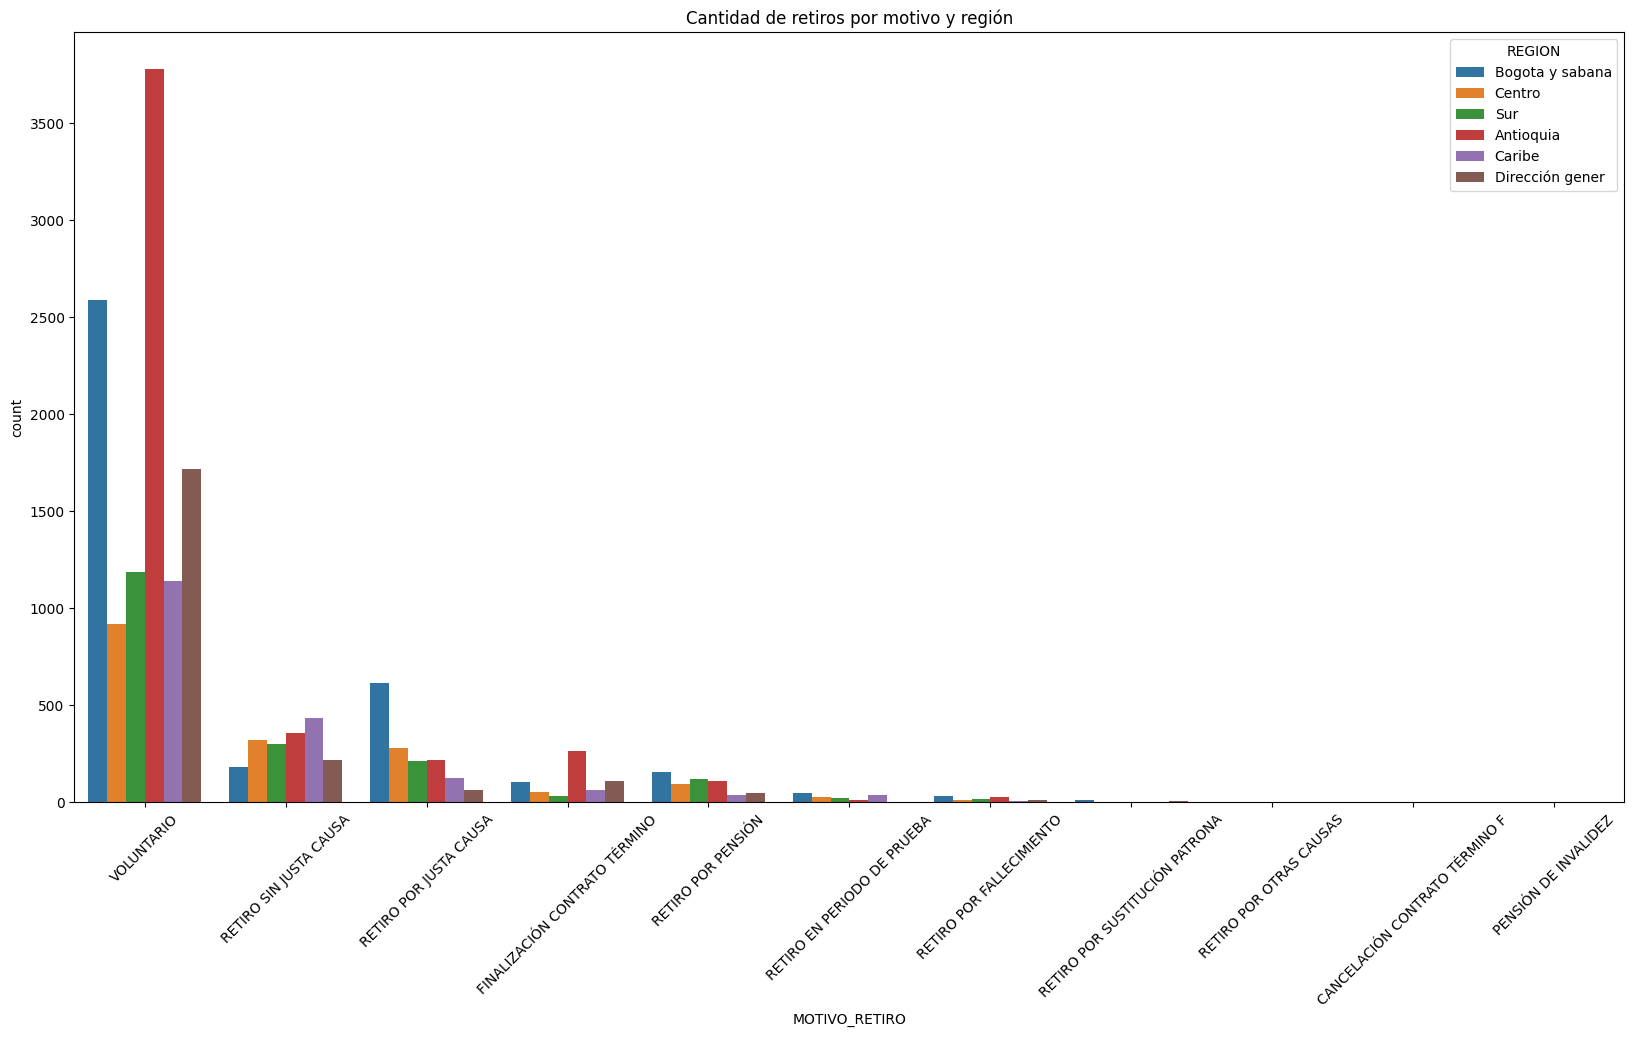

In [64]:
#grafico de barras de la variable motivo de retiro con la región, nos ayuda a identificar cual es el motivo y su representatividad
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', hue='REGION', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo y región')
plt.xticks(rotation=45)
plt.show()

Se evidencia una gran concentración de retiros voluntarios en la región Antioquia

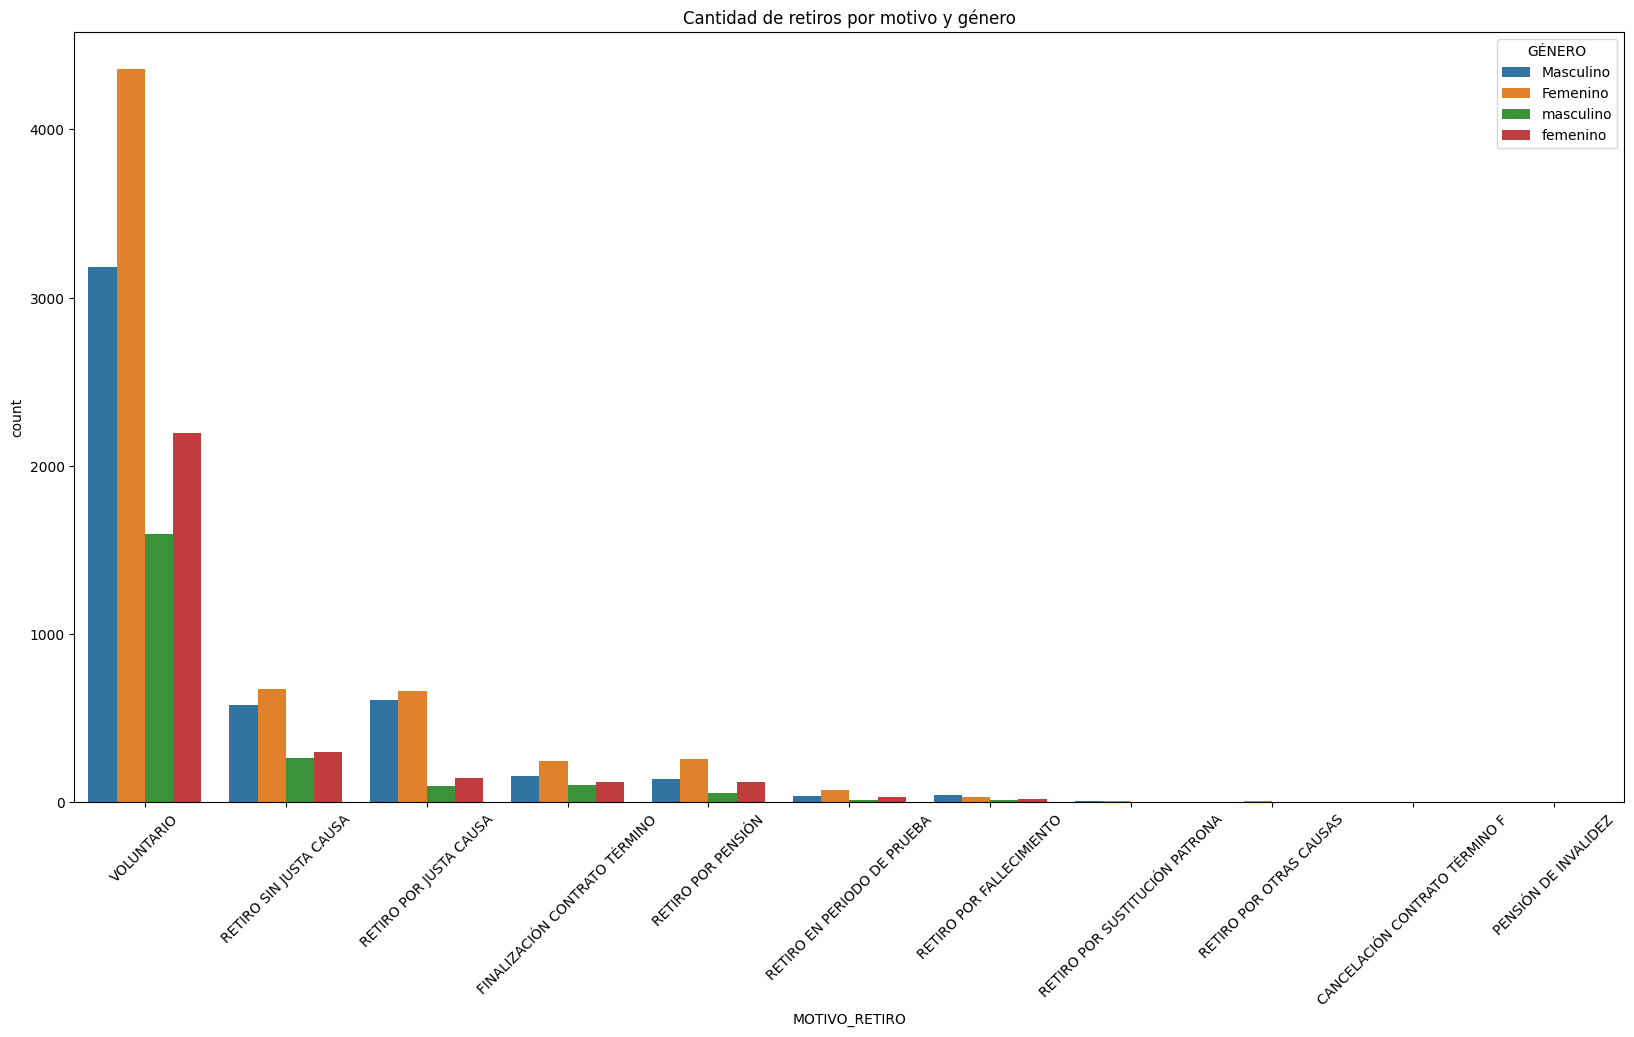

In [65]:
#Ahora, queremos hacer un grafico de barras para identificar el tipo de retiro por genero
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', hue='GÉNERO', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo y género')
plt.xticks(rotation=45)
plt.show()

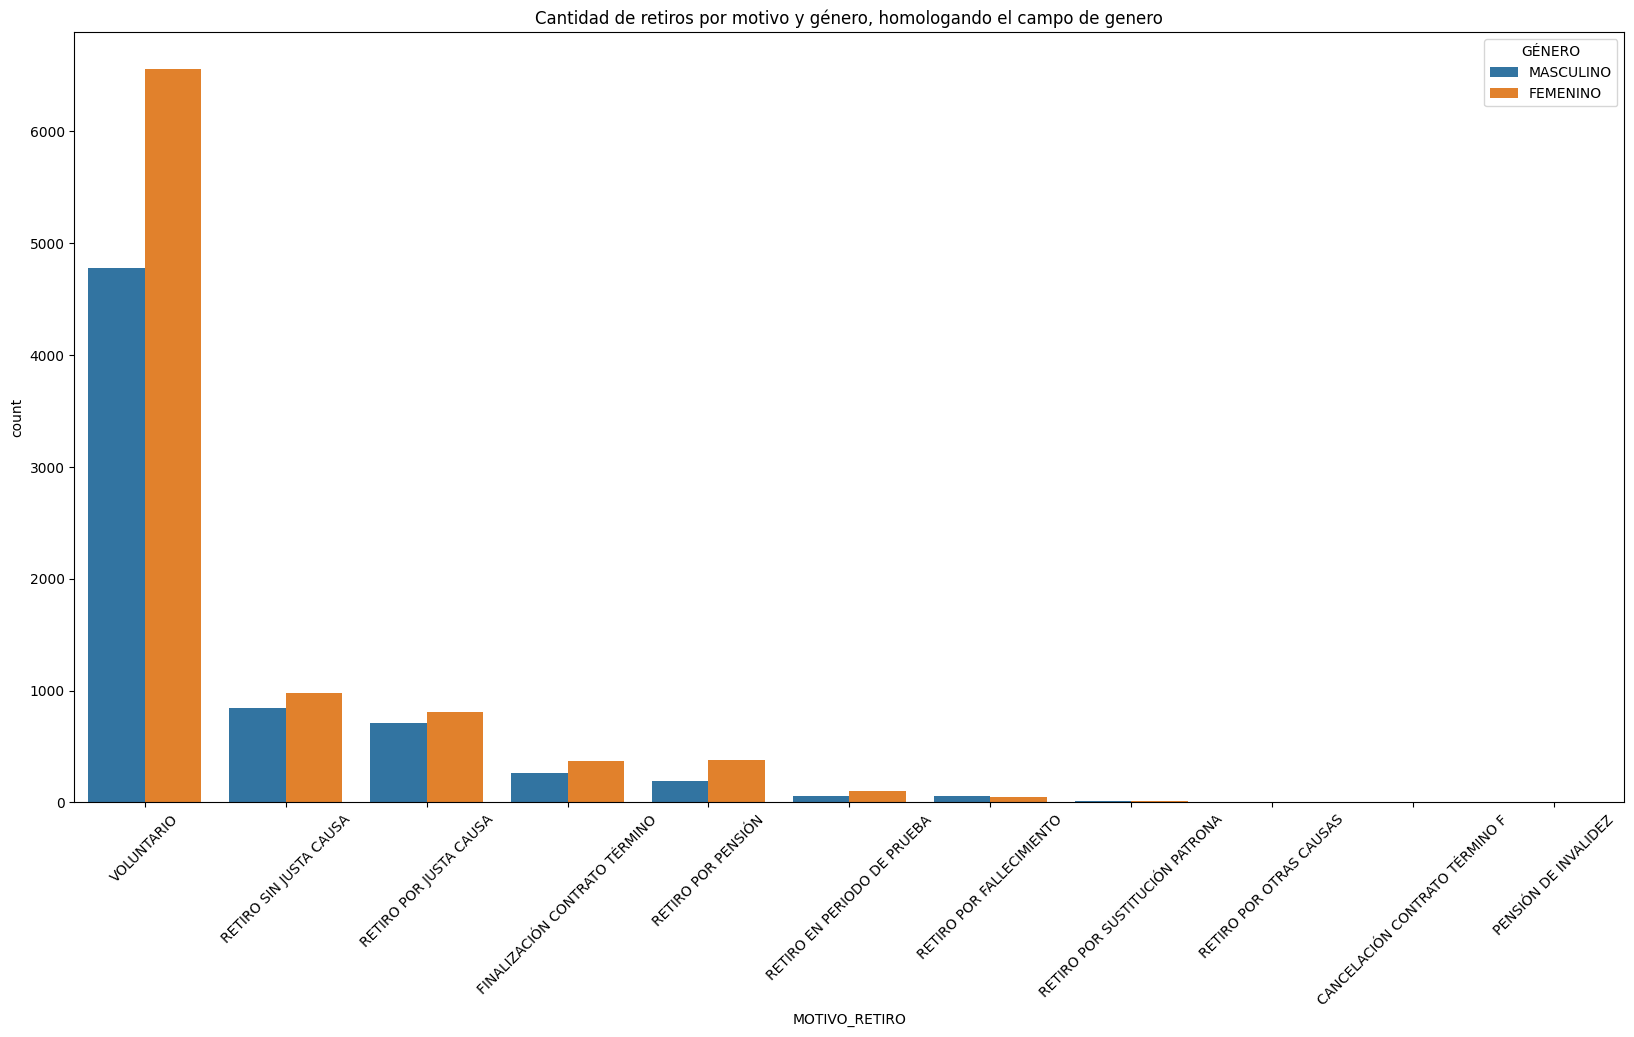

In [66]:
#En el paso anterior identificamos que existe un error en el campo de genero, porque algunos registros empiezan con la primer letra en mayuscula y otros en minuscula, la información que contendría el campo es FEMENINO o MASCULINO, entonces vamos a homologar el campo de genero para que todos queden en mayusculas
retiros['GÉNERO'] = retiros['GÉNERO'].str.upper()
#Ahora, volvemos a realizar el grafico de barras para identificar el tipo de retiro por genero
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', hue='GÉNERO', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo y género, homologando el campo de genero')
plt.xticks(rotation=45)
plt.show()


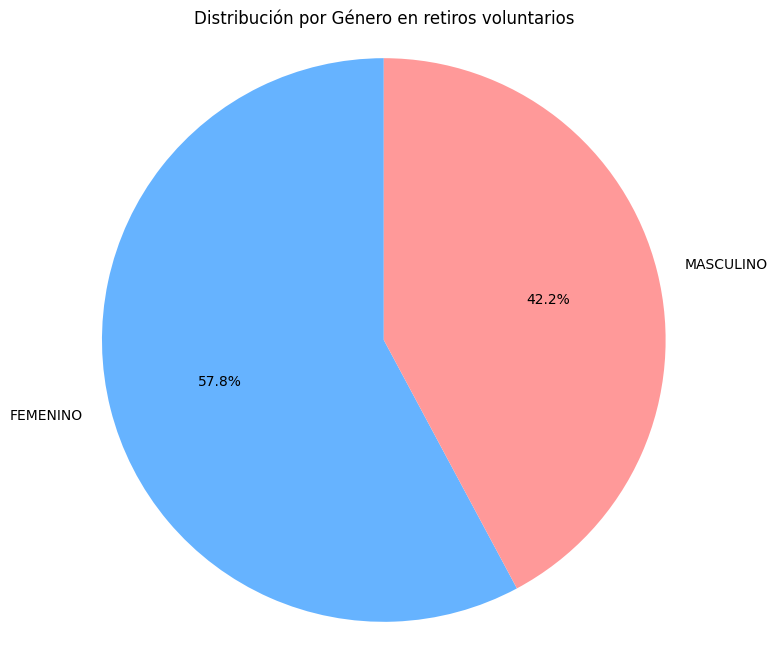

In [67]:
#Queremos hacer el grfico circular, aprovechando que son 2 variables y así tener información global
# Filtrar registros cuyo motivo contenga "VOLUNTARIO" (sin importar mayúsculas/minúsculas)
retiro_voluntario = retiros[retiros['MOTIVO_RETIRO'].str.contains('VOLUNTARIO', case=False, na=False)]

# Contar por género
genero_conteo = retiro_voluntario['GÉNERO'].value_counts()

# Graficar
plt.figure(figsize=(8, 8))
plt.pie(genero_conteo, labels=genero_conteo.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribución por Género en retiros voluntarios')
plt.axis('equal')
plt.show()

Se evidencia que existe una mayor concentración de retiros para las mujeres (58%), y este fenomeno se da para todos los tipos de retiros

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'VOLUNTARIO'),
  Text(1, 0, 'RETIRO SIN JUSTA CAUSA'),
  Text(2, 0, 'RETIRO POR JUSTA CAUSA'),
  Text(3, 0, 'FINALIZACIÓN CONTRATO TÉRMINO'),
  Text(4, 0, 'RETIRO POR PENSIÓN'),
  Text(5, 0, 'RETIRO EN PERIODO DE PRUEBA'),
  Text(6, 0, 'RETIRO POR FALLECIMIENTO'),
  Text(7, 0, 'RETIRO POR SUSTITUCIÓN PATRONA'),
  Text(8, 0, 'RETIRO POR OTRAS CAUSAS'),
  Text(9, 0, 'CANCELACIÓN CONTRATO TÉRMINO F'),
  Text(10, 0, 'PENSIÓN DE INVALIDEZ')])

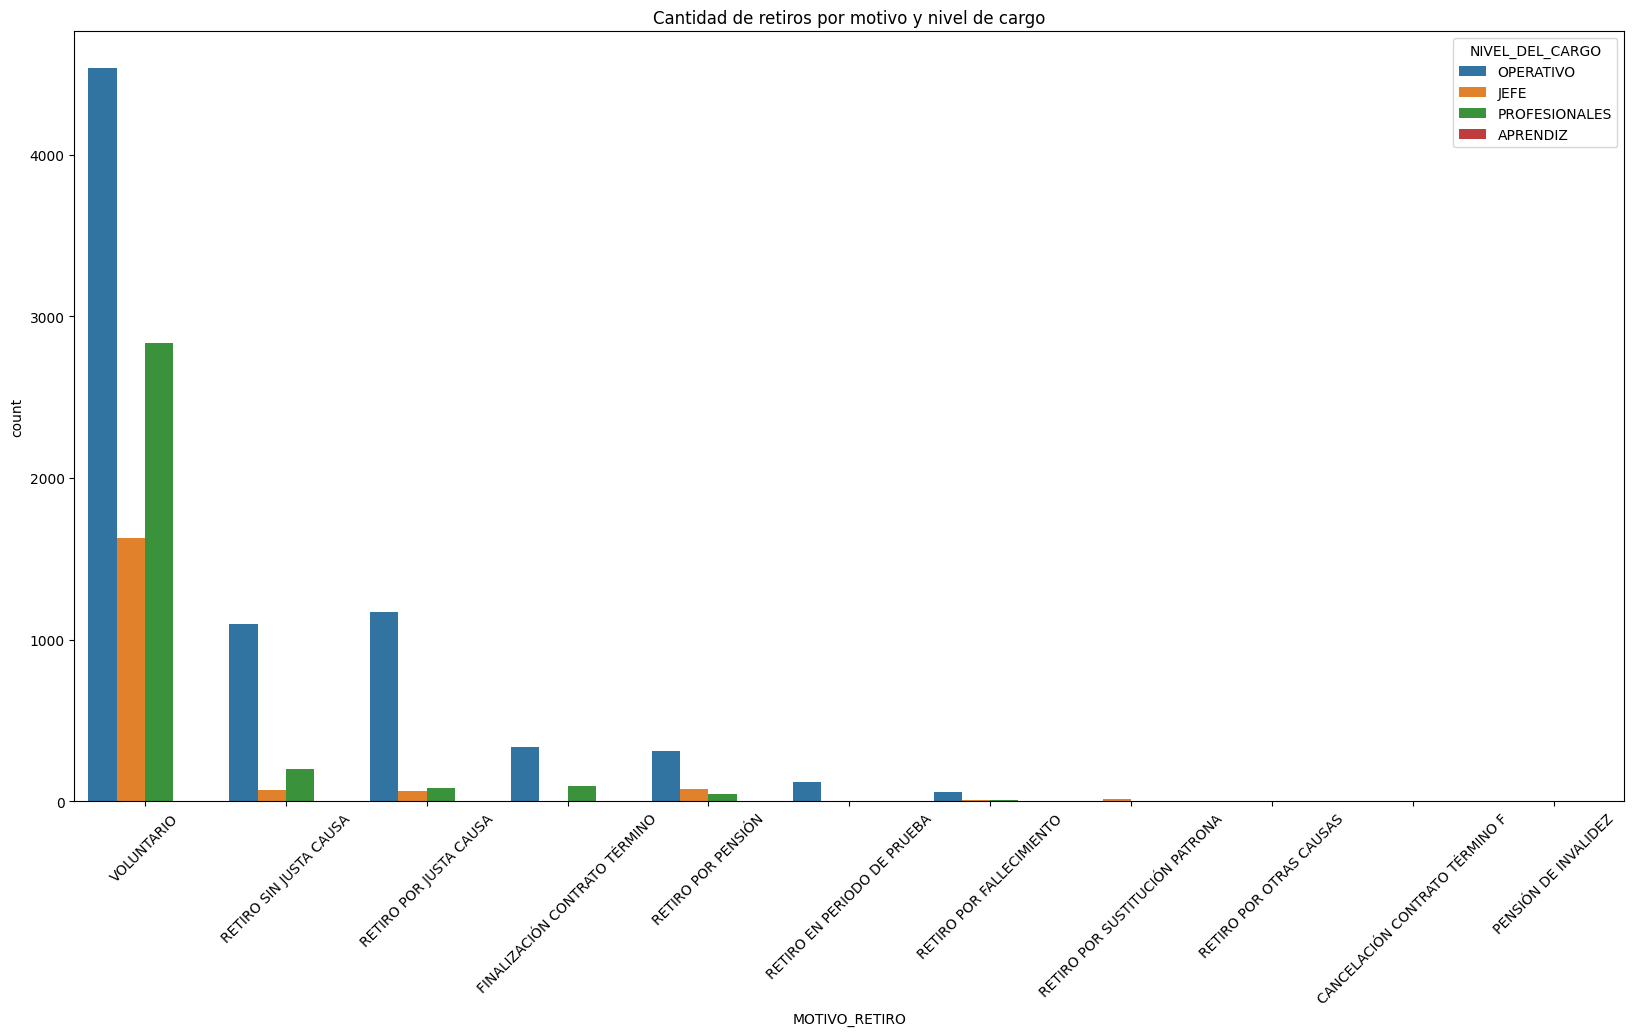

In [68]:
#Ahora,conozcamos más detalle a nivel de cargo, para evidenciar si está enmarcado en un nivel de cargo especifico
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', hue='NIVEL_DEL_CARGO', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo y nivel de cargo')
plt.xticks(rotation=45)

Se evidencia una concentración de retiros voluntarios en el nivel de cargo Operativo, es decir, por ahora llevamos que la concentración está:
- región Antioquia
- Nivel de cargo operativo
- Género: femenino

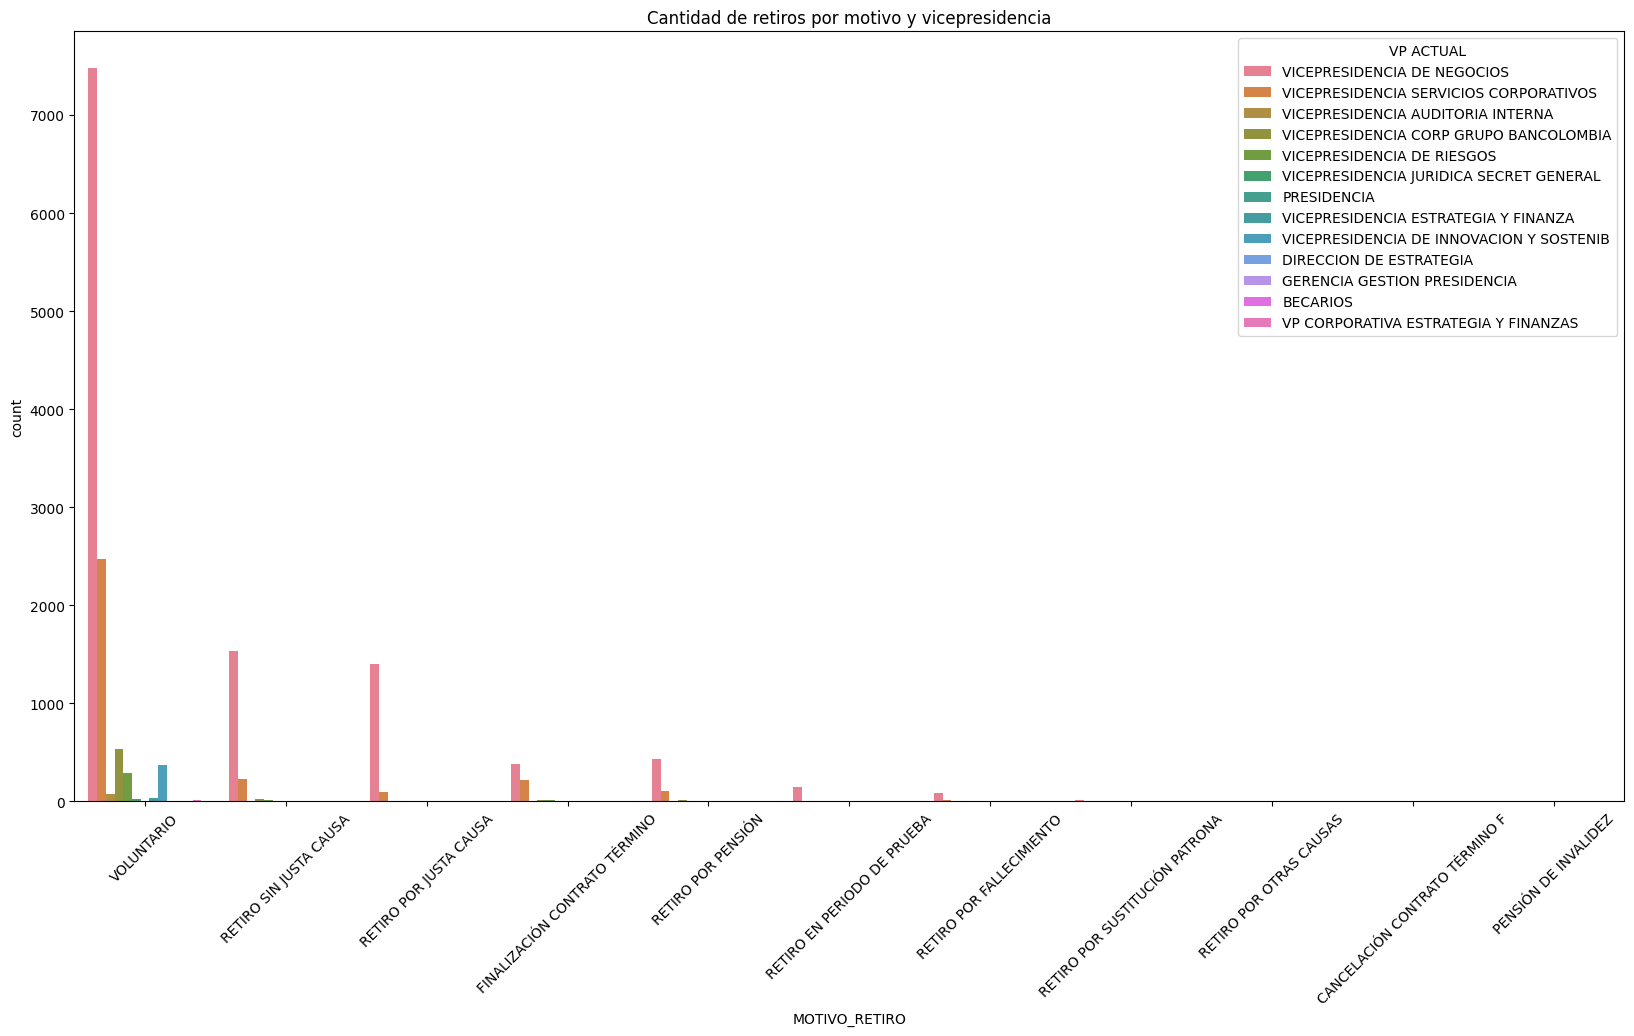

In [69]:
#ahora, quiero conocer el detalle de los retiros por vicepresidencia, y así conocer donde se pueden concentrar los retiros por áreas
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='MOTIVO_RETIRO', hue='VP ACTUAL', order=retiros['MOTIVO_RETIRO'].value_counts().index)
plt.title('Cantidad de retiros por motivo y vicepresidencia')
plt.xticks(rotation=45)
plt.show()


In [70]:
#otro tipo de grafico para evidenciar la cantidad de retiros por motivo y vicepresidencia
fig = px.histogram(retiros, x='MOTIVO_RETIRO', color='VP ACTUAL', title='Cantidad de retiros por motivo y vicepresidencia')
fig.update_layout(barmode='group', xaxis_title='Motivo de Retiro', yaxis_title='Cantidad de Registros')
fig.show()

Se evidencia una concentración de retiros en la Vicepresidencia de negocios y vicepresidencia de servicios corporativos, haciendo un analisis desde el conocimiento de la problematica, tiene sentido, debido a que son las áreas donde se tienen una cantidad mayor de empleados con conocimientos especializados.

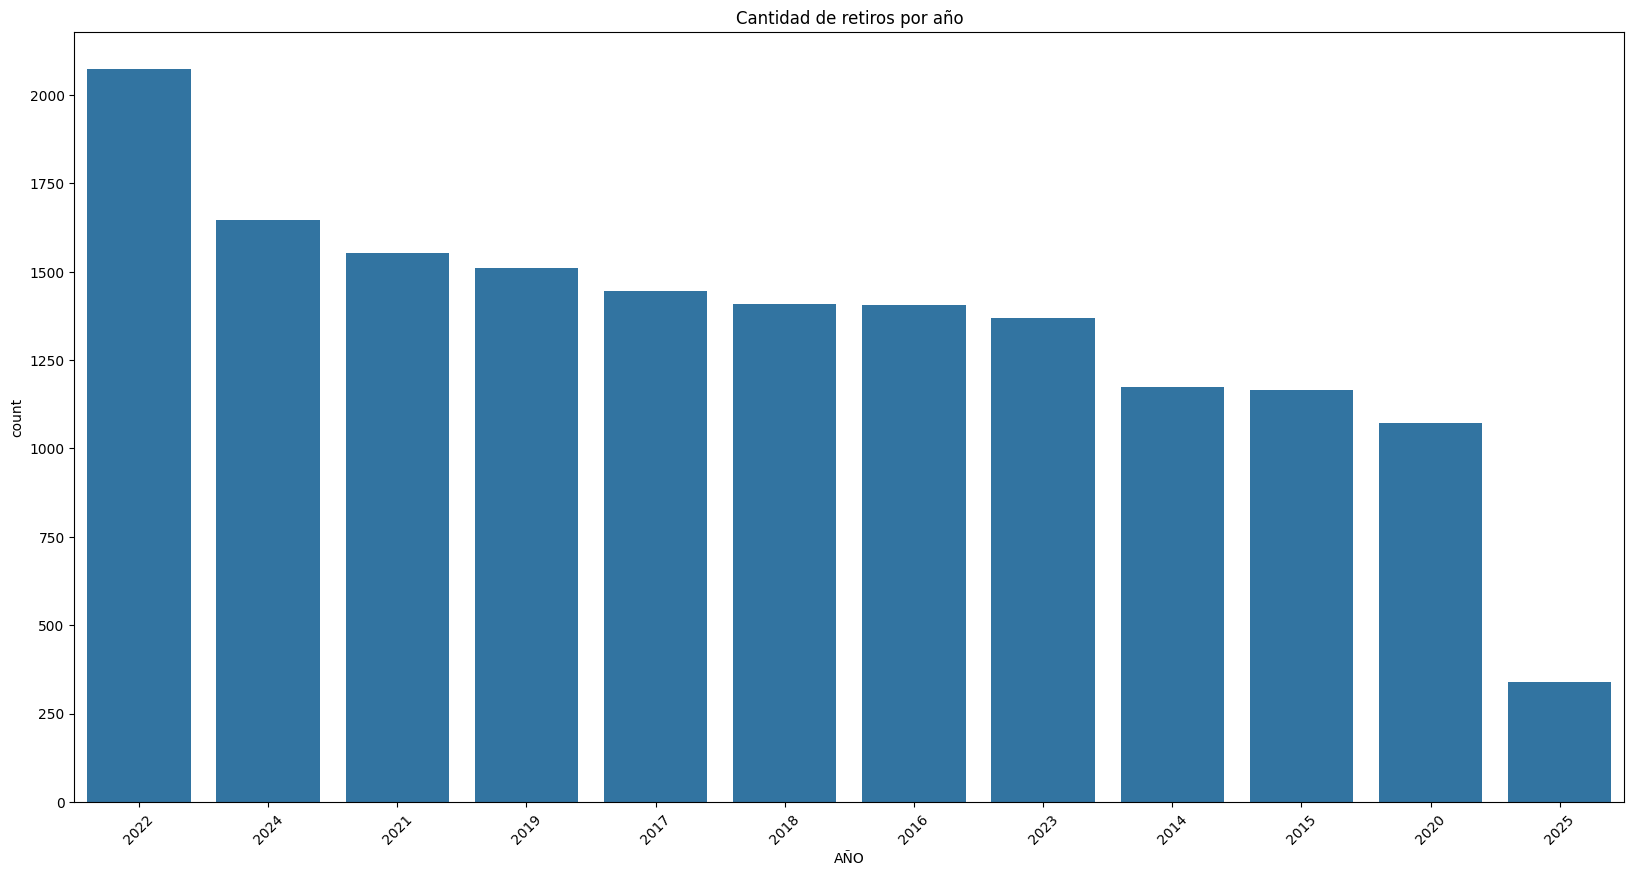

In [71]:
#Ahora, queremos hacer un grafico para identificar la dipersión de los retiros por año
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='AÑO', order=retiros['AÑO'].value_counts().index)
plt.title('Cantidad de retiros por año')
plt.xticks(rotation=45)
plt.show()


En el analisis anterior se puede evidenciar que no se tiene una tendencia tan marcada a medida de los años, realmente se tiene que entender el negocio en esos años especificos, por ejemplo: El año que tienen más retiros es el año 2022, seguido del 2024 y luego 2021; Es decir, no se tiene una tendencia de linea de año a año; Tener en cuenta que en el año 2025 solo se tienen 3 meses de lo que va corrido del año.

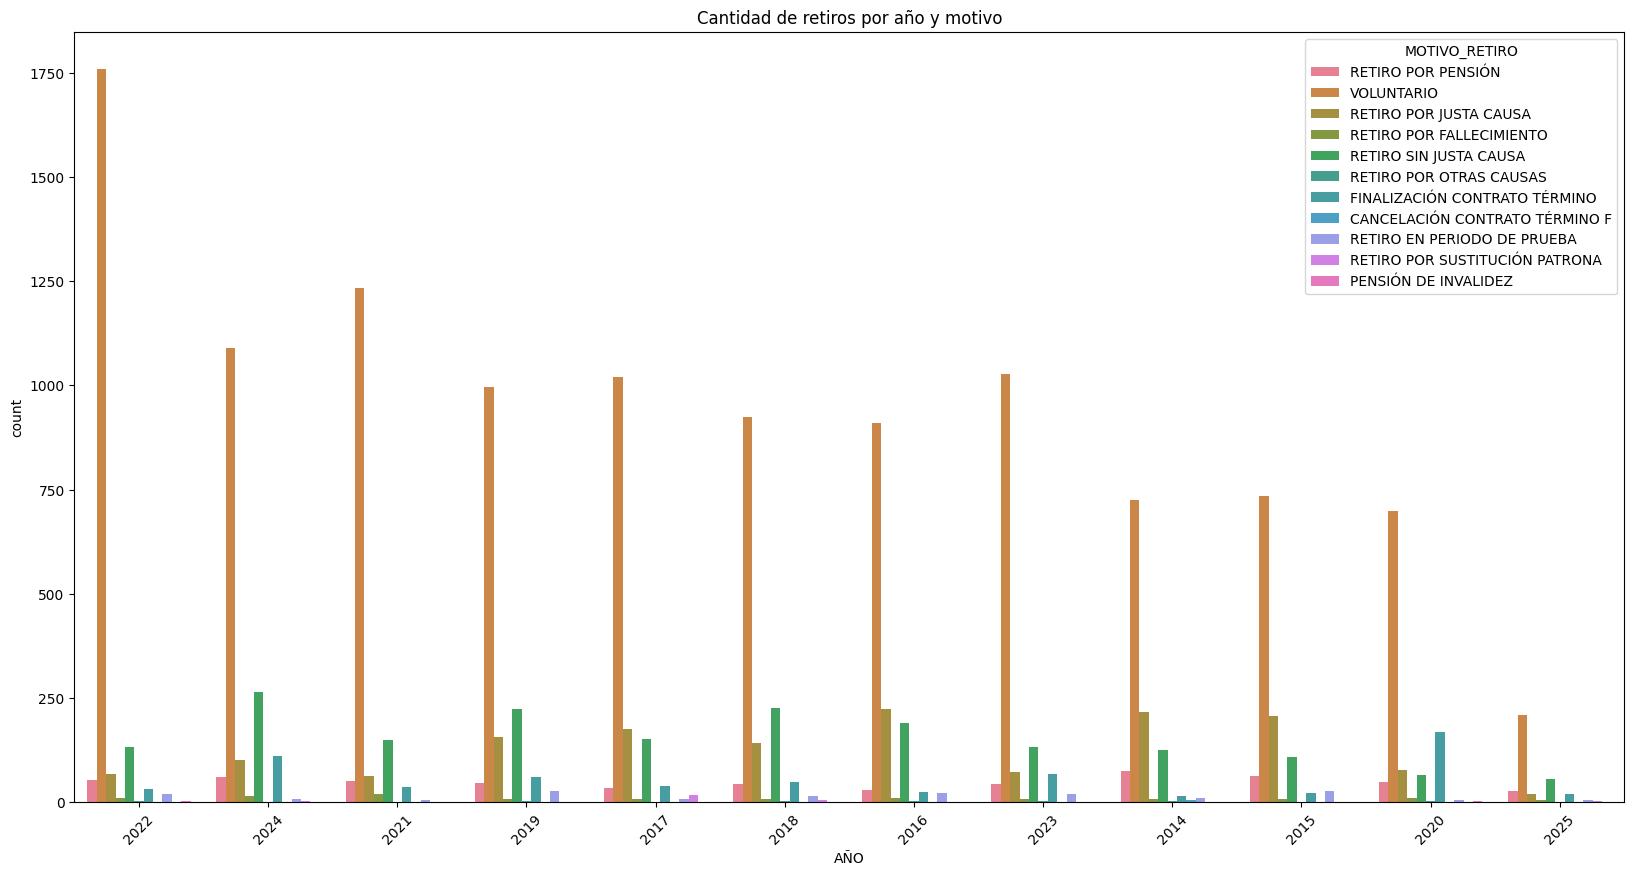

In [72]:
#De acuerdo al grafico anterior, sería bueno conocer los motivos de retiro por cada uno de los años
plt.figure(figsize=(20, 10))
sns.countplot(data=retiros, x='AÑO', hue='MOTIVO_RETIRO', order=retiros['AÑO'].value_counts().index)
plt.title('Cantidad de retiros por año y motivo')
plt.xticks(rotation=45)
plt.show()

En el gráfico anterior se evidencia por cada uno de los años la tipología de retiro, se evidencia que en todos los años el retiro voluntario es el de mahor volumen.

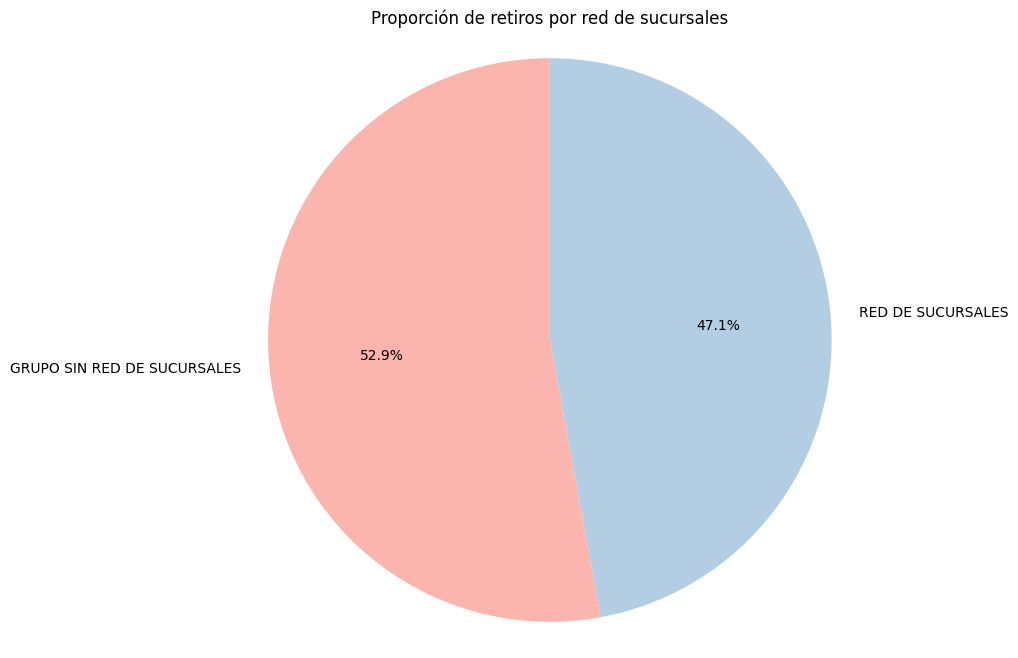

In [73]:
#Queremos conocer por medio de un grafico circular la cantidad de retiros totales por el campo "red de sucursales", el cual nos ayudará a evidenciar la proporción entre los empleados administrativos y comerciales

# Lo primero es Contar cantidad de retiros por red de sucursales
sucursal_conteo = retiros['RED_DE_SUCURSALES'].value_counts()

# Crear gráfico
plt.figure(figsize=(8, 8))
plt.pie(sucursal_conteo, labels=sucursal_conteo.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Proporción de retiros por red de sucursales')
plt.axis('equal')  # Para que el círculo no se deforme
plt.show()

En el gráfico anterior se puede evidencia que existe una proporción equivalente entre los retiros voluntarios de los empleados comerciales y administrativos, la diferencia entre de 4%, teniendo que: 
- Grupo sin red de sucursales (administrativos): 52.9%
- Grupo con red de sucursales (comerciales):47.1%

La diferencia no es significativa, sin embargo, enfatizar que está más concentrado en los administrativos

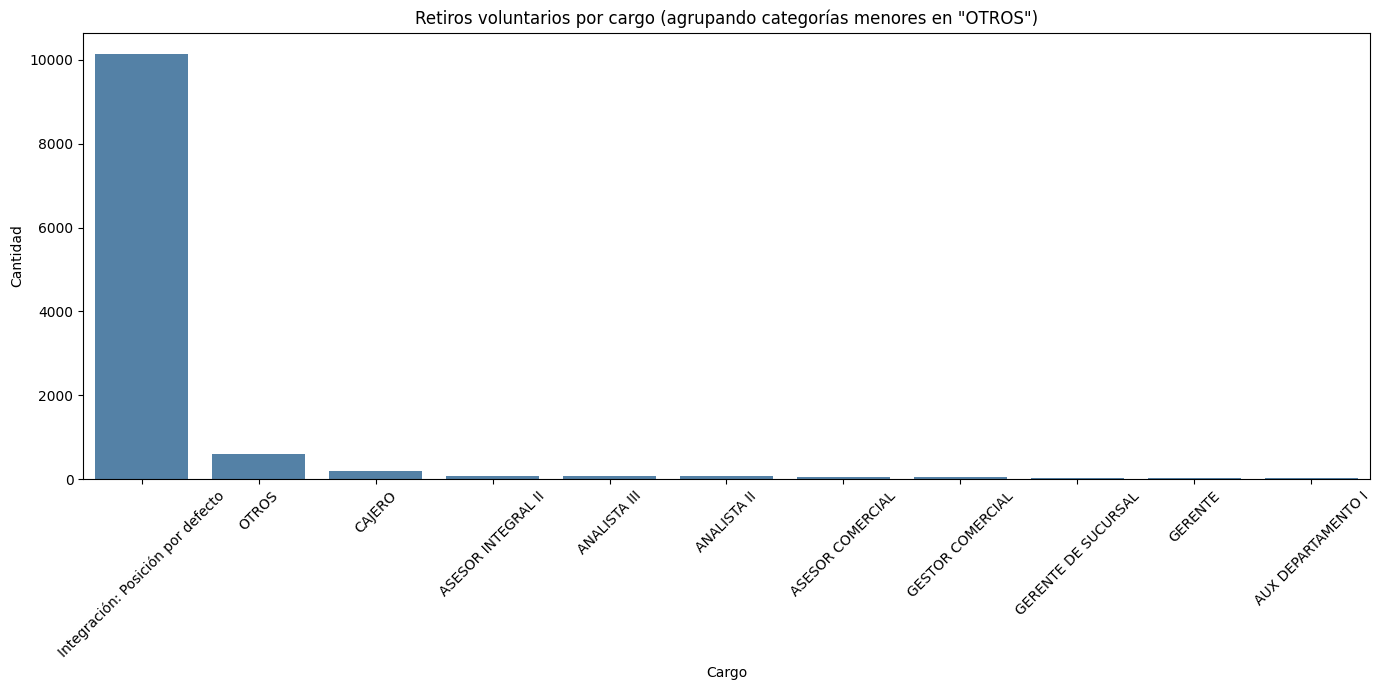

In [74]:
# Contar retiro voluntario por cargo
cargo_conteo = retiro_voluntario['CARGO'].value_counts()

# como se tienen tantos tipos de retiros, se define el top 10 
top_cargos = cargo_conteo.head(10).index

# Reemplazar los menos frecuentes por 'OTROS'
retiro_voluntario['CARGO AGRUPADO'] = retiro_voluntario['CARGO'].apply(lambda x: x if x in top_cargos else 'OTROS')

# Graficar
plt.figure(figsize=(14, 7))
sns.countplot(data=retiro_voluntario, x='CARGO AGRUPADO', order=retiro_voluntario['CARGO AGRUPADO'].value_counts().index, color='steelblue')
plt.title('Retiros voluntarios por cargo (agrupando categorías menores en "OTROS")')
plt.xlabel('Cargo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En el gráfico anterior podemos evidenciar que la mayoría de los retiros quedan agrupados en el cargo "Integración Posición por defecto", este cargo no nos hace sentido, pero validando con el negocio, logramos entender que cuando un empleado se retira de la organización automaticamente el sistema le pone dicha descripción; De hecho, los registros que tienne cargo es proque en años anteriores está regla no existía, por este motivo, debemos analizar es el cargo anterior, a continiación el grafico.

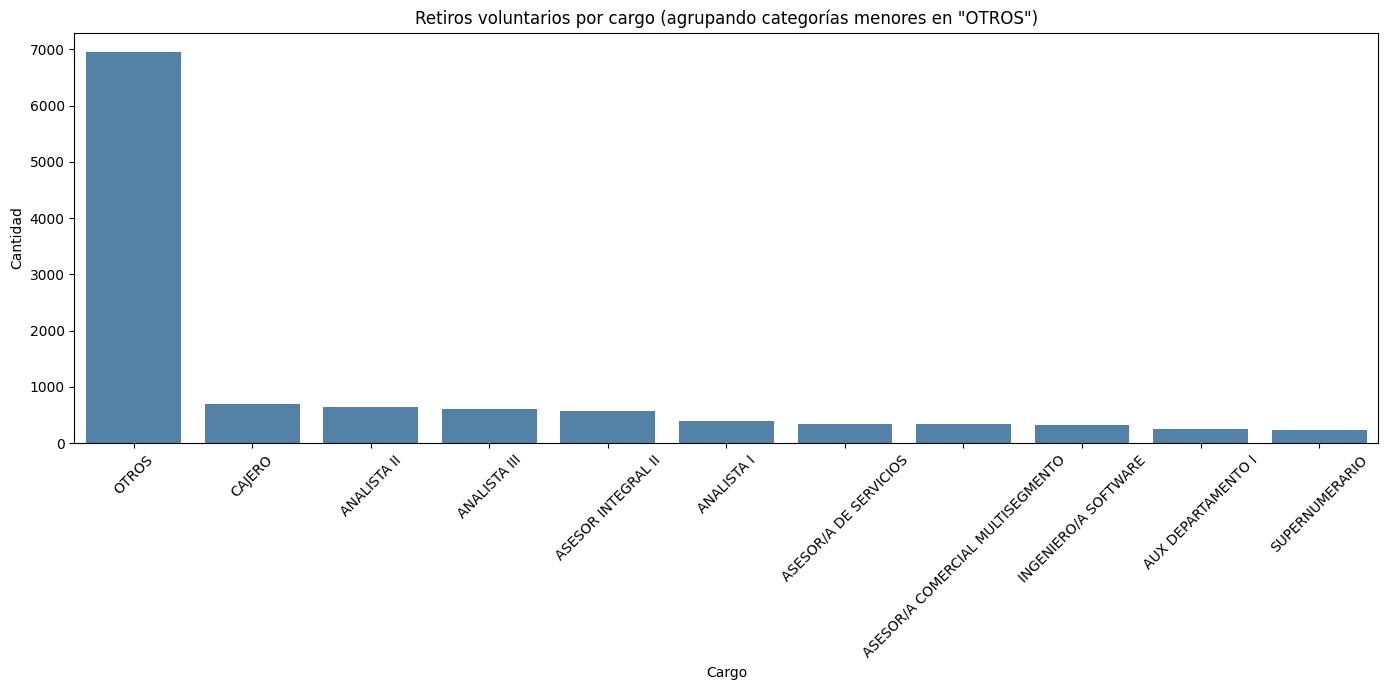

In [75]:
#Ahora, vamos a hacer el mismo gráfico anterior, pero con el campo: cargo anterior

# Contar retiro voluntario por cargo anterior
cargo_anterior_conteo = retiro_voluntario['CARGO_ANTERIOR'].value_counts()

# como se tienen tantos tipos de retiros, se define el top 10 
top_cargos = cargo_anterior_conteo.head(10).index

# Reemplazar los menos frecuentes por 'OTROS'
retiro_voluntario['CARGO AGRUPADO'] = retiro_voluntario['CARGO_ANTERIOR'].apply(lambda x: x if x in top_cargos else 'OTROS')

# Graficar
plt.figure(figsize=(14, 7))
sns.countplot(data=retiro_voluntario, x='CARGO AGRUPADO', order=retiro_voluntario['CARGO AGRUPADO'].value_counts().index, color='steelblue')
plt.title('Retiros voluntarios por cargo (agrupando categorías menores en "OTROS")')
plt.xlabel('Cargo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Se evidencia, que la mayoría de retiros se dan en los cargos de: Cajero, analista II, analistas III, asesor integral II, analista I, entre algunos otros que refleja el grafico anterior.

In [76]:
#Queremos hacer un analisis a nivel de la fecha, teniendo en cuenta que tenemos los regitros de los retiros por mes y año, pero, cuando sacamos la información del campo, identificamos que el tipo de campo es object, entonces debemos primer convertir a formato fecha, es decir: datatime
retiros['FECHA_DESDE'] = pd.to_datetime(retiros['FECHA_DESDE'], format='%Y-%m-%d', errors='coerce')

#Verificar el cambio de tipo de dato
print(retiros[['FECHA_DESDE']].head(10))
retiros.info()



       FECHA_DESDE
97982          NaT
95223          NaT
65643          NaT
66831          NaT
90694          NaT
104371         NaT
79593          NaT
106244         NaT
76847          NaT
83930          NaT
<class 'pandas.core.frame.DataFrame'>
Index: 16172 entries, 97982 to 640
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID_EMPLEADOS              16172 non-null  int64         
 1   COMPAÑÍA                  16172 non-null  object        
 2   CODIGO_AREA               16172 non-null  int64         
 3   AREA                      16161 non-null  object        
 4   CODIGO_CARGO              16172 non-null  int64         
 5   CARGO                     16172 non-null  object        
 6   REGION                    16172 non-null  object        
 7   FORMA_DE_TRABAJO          16172 non-null  object        
 8   CLASE_DE_MEDIDA           16172 non-null  object        
 9 

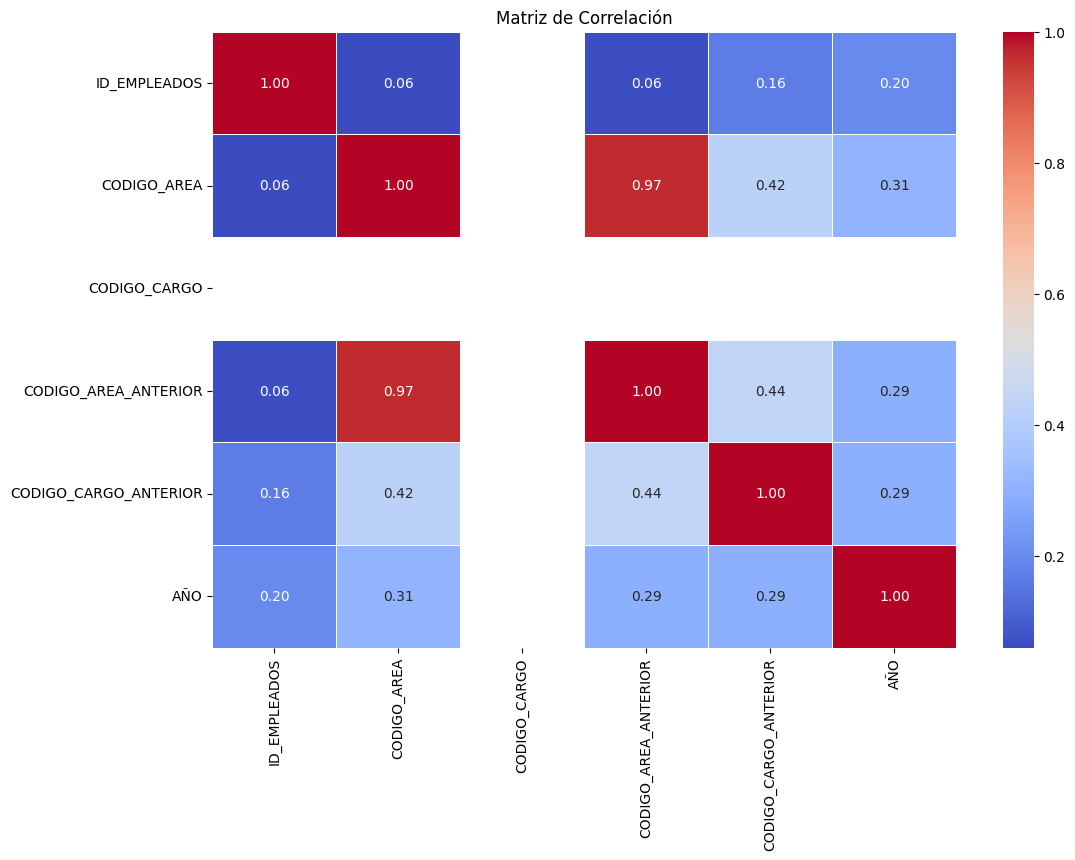

In [ ]:
#Queremos hacer una matriz de correlación para identificar si existe alguna relación entre las variables, para esto, primero debemos eliminar las variables que no son numéricas, y luego hacer la matriz de correlación
# Seleccionar solo las columnas numéricas
numericas = retiros.select_dtypes(include=[np.number])
# Calcular la matriz de correlación
correlation_matrix = numericas.corr()
# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()



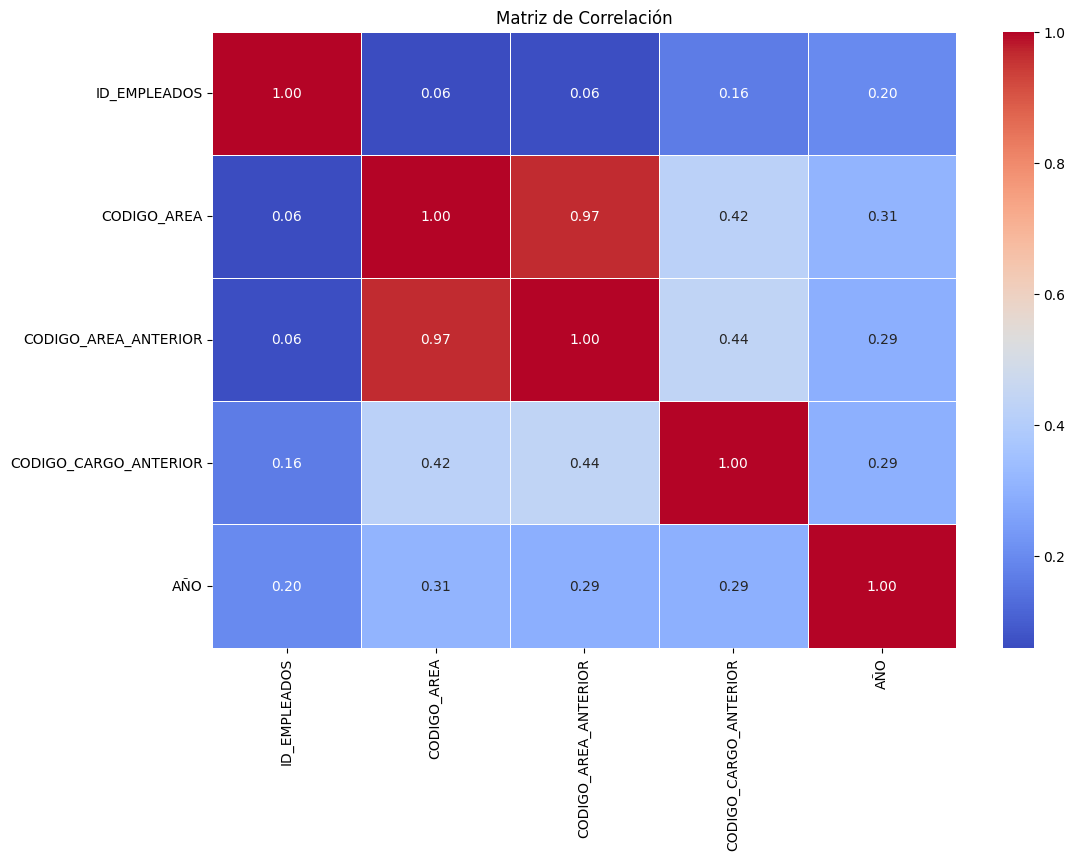

In [78]:

#Evidenciamos que el campo codigo_cargo no genera valor en la correlación, entonces lo eliminamos y hacemos de nuevo la matriz de correlación
numericas = retiros.select_dtypes(include=[np.number])
numericas = numericas.drop(columns=['CODIGO_CARGO'])
# Calcular la matriz de correlación
correlation_matrix = numericas.corr()
# Crear un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()